# Notebook to clean 50 samplesdata

## Notebook description

This notebook is used to clean all 50 data sets which will be used in this project.

The cleaning will start by cropping all data sets to the same length. Afterwards follows a down-sampling on the data.

## Imports

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math
from functools import reduce
sns.set()
%matplotlib inline
import os

### GLOBALS

In [24]:
PATH_RAW = 'data/raw/samples50/'
PATH_CLEAN = 'data/cleaned/samples50/'
IMAGES_DIR = 'images/reference/'
THRESHOLD = 500


In [8]:
#%ll data/raw/samples50

### Verify number of files

In [25]:
counter = 0
for filename in os.listdir(PATH_RAW):
    if filename.endswith(".csv"):
        counter += 1
print(f"There are {counter} csv files in {PATH_RAW}")

There are 50 csv files in data/raw/samples50/


In [26]:
data_frames = []
for filename in os.listdir(PATH_RAW):
    tmp_df = pd.read_csv(PATH_RAW + filename)
    data_frames.append(tmp_df)

In [28]:
#for _df in data_frames:
#    print(_df.shape)
#data_frames[17]

# Data Cleaning

Combine the date, hour, minute and second fields to a date-time. 
This may take a while!

In [29]:
def create_time_stamp(row):
    # '2020-04-06T09:03:51+0000'
    seconds = int(row['second'])
    minutes = int(row['minute'])
    hours = int(row['hour'])
    date = row['date']  # 2020-09-09
    
    ts_str = f"{date}T{hours}:{minutes}:{seconds}+0000"
    ts_obj = datetime.datetime.strptime(ts_str, '%Y-%m-%dT%H:%M:%S%z')
    return ts_obj

# Create Timestamps
for _df in data_frames:
    _df['timestamp'] = _df.apply(lambda row: create_time_stamp(row), axis=1)

In [102]:
data_frames[0]

id  heart_rate  respiration_rate  \
timestamp                                                         
2020-10-14 20:00:20+00:00  363481           0                 0   
2020-10-14 20:00:21+00:00  363482           0                 0   
2020-10-14 20:00:22+00:00  363483           0                 0   
2020-10-14 20:00:23+00:00  363484           0                 0   
2020-10-14 20:00:24+00:00  363485           0                 0   
...                           ...         ...               ...   
2020-10-15 10:00:25+00:00  509756           0                 0   
2020-10-15 10:00:26+00:00  509757           0                 0   
2020-10-15 10:00:27+00:00  509758           0                 0   
2020-10-15 10:00:28+00:00  509759           0                 0   
2020-10-15 10:00:29+00:00  509760           0                 0   

                           relative_stroke_volume  heart_rate_variability  \
timestamp                                                                   
2020-10-14 20:00:20+00:00                       0                       0   
2020-10-14 20:00:21+00:00                       0                       0   
2020-10-14 20:00:22+00:00                       0                       0   
2020-10-14 20:00:23+00:00                       0                       0   
2020-10-14 20:00:24+00:00                       0                       0   
...                                           ...                     ...   
2020-10-15 10:00:25+00:00                       0                       0   
2020-10-15 10:00:26+00:00                       0                       0   
2020-10-15 10:00:27+00:00                       0                       0   
2020-10-15 10:00:28+00:00                       0                       0   
2020-10-15 10:00:29+00:00                       0                       0   

                           measured_signal_strength  status  b2b1  b2b2  b2b3  \
timestamp                                                                       
2020-10-14 20:00:20+00:00                       560       0     0     0     0   
2020-10-14 20:00:21+00:00                       639       0     0     0     0   
2020-10-14 20:00:22+00:00                       728       0     0     0     0   
2020-10-14 20:00:23+00:00                       843       0     0     0     0   
2020-10-14 20:00:24+00:00                       841       0     0     0     0   
...                                             ...     ...   ...   ...   ...   
2020-10-15 10:00:25+00:00                       619       0     0     0     0   
2020-10-15 10:00:26+00:00                       659       0     0     0     0   
2020-10-15 10:00:27+00:00                       710       0     0     0     0   
2020-10-15 10:00:28+00:00                       658       0     0     0     0   
2020-10-15 10:00:29+00:00                       591       0     0     0     0   

                           ... day  month  year  location_name room  patient  \
timestamp                  ...                                                 
2020-10-14 20:00:20+00:00  ...  14     10  2020            DEV    1    eeeee   
2020-10-14 20:00:21+00:00  ...  14     10  2020            DEV    1    eeeee   
2020-10-14 20:00:22+00:00  ...  14     10  2020            DEV    1    eeeee   
2020-10-14 20:00:23+00:00  ...  14     10  2020            DEV    1    eeeee   
2020-10-14 20:00:24+00:00  ...  14     10  2020            DEV    1    eeeee   
...                        ...  ..    ...   ...            ...  ...      ...   
2020-10-15 10:00:25+00:00  ...  15     10  2020            DEV    1    eeeee   
2020-10-15 10:00:26+00:00  ...  15     10  2020            DEV    1    eeeee   
2020-10-15 10:00:27+00:00  ...  15     10  2020            DEV    1    eeeee   
2020-10-15 10:00:28+00:00  ...  15     10  2020            DEV    1    eeeee   
2020-10-15 10:00:29+00:00  ...  15     10  2020            DEV    1    eeeee   

                                 sensor hour  minute  second  

## Deal with dublicated values

Print duplicates

In [30]:
for i, _df in enumerate(data_frames):
    print(f"Number of duplicated timestamps in #{i+1}: {_df.timestamp.duplicated().sum()}")


Number of duplicated timestamps in #1: 5
Number of duplicated timestamps in #2: 27
Number of duplicated timestamps in #3: 13
Number of duplicated timestamps in #4: 0
Number of duplicated timestamps in #5: 120
Number of duplicated timestamps in #6: 0
Number of duplicated timestamps in #7: 0
Number of duplicated timestamps in #8: 0
Number of duplicated timestamps in #9: 0
Number of duplicated timestamps in #10: 0
Number of duplicated timestamps in #11: 1
Number of duplicated timestamps in #12: 118
Number of duplicated timestamps in #13: 2
Number of duplicated timestamps in #14: 0
Number of duplicated timestamps in #15: 118
Number of duplicated timestamps in #16: 120
Number of duplicated timestamps in #17: 472
Number of duplicated timestamps in #18: 59
Number of duplicated timestamps in #19: 0
Number of duplicated timestamps in #20: 0
Number of duplicated timestamps in #21: 0
Number of duplicated timestamps in #22: 0
Number of duplicated timestamps in #23: 0
Number of duplicated timestamp

Drop duplicates, but keep first value

In [31]:
for _df in data_frames:
    _df.drop_duplicates(subset=["timestamp"], keep='first', inplace=True)

Ensure there are no duplicates anymore

In [32]:
for i, _df in enumerate(data_frames):
    print(f"Number of duplicated timestamps in #{i+1}: {_df.timestamp.duplicated().sum()}")

Number of duplicated timestamps in #1: 0
Number of duplicated timestamps in #2: 0
Number of duplicated timestamps in #3: 0
Number of duplicated timestamps in #4: 0
Number of duplicated timestamps in #5: 0
Number of duplicated timestamps in #6: 0
Number of duplicated timestamps in #7: 0
Number of duplicated timestamps in #8: 0
Number of duplicated timestamps in #9: 0
Number of duplicated timestamps in #10: 0
Number of duplicated timestamps in #11: 0
Number of duplicated timestamps in #12: 0
Number of duplicated timestamps in #13: 0
Number of duplicated timestamps in #14: 0
Number of duplicated timestamps in #15: 0
Number of duplicated timestamps in #16: 0
Number of duplicated timestamps in #17: 0
Number of duplicated timestamps in #18: 0
Number of duplicated timestamps in #19: 0
Number of duplicated timestamps in #20: 0
Number of duplicated timestamps in #21: 0
Number of duplicated timestamps in #22: 0
Number of duplicated timestamps in #23: 0
Number of duplicated timestamps in #24: 0
N

## Change index

In [33]:
for _df in data_frames:
    try:
        _df.set_index('timestamp', inplace=True)
    except KeyError:
        pass

In [34]:
for _df in data_frames:
    _df.sort_index(inplace=True)

# Replace missing values

First of all we want to make sure, that all time series start at the same time and have a value for every second.

## Crop to the same length

The used time series are recorded from 8:00 PM to 10:00 AM.
The sampling granularity is one second. However due to the sensors behaviour, some data points are missing every 30s.
Due to the fine granularity this is negligible.
Most often the first few 1000 measures of these time series are 0 (the bed is not yet occupied). Therefore we will crop them at the beginning and end to have the same start and endpoint.

If data would be sent every second wihout missing data, each time series would be $14\cdot3600 = 50400$ rows long. However the length is usually around 48000.

In [42]:
start_time_dates = []
end_time_dates = []
for _df in data_frames:

    ts_start = _df.index[0]
    ts_end = _df.index[-1]
    
    start_time_dates.append(ts_start)
    end_time_dates.append(ts_end)

In [58]:
# Remove date, only keep time

start_times = list(map(lambda x: x.time(), start_time_dates))
end_times = list(map(lambda x: x.time(), end_time_dates))

In [72]:
same_start_time = None
same_end_time = None

# Take the biggest index as start
same_start_time = max(start_times)

# Take the smallest index as end
same_end_time = min(end_times)
    
print(f"The dataframes need to be cropped from {same_start_time}PM to {same_end_time}AM")

The dataframes need to be cropped from 20:08:18PM to 09:52:34AM


In [78]:
str(same_start_time)

'20:08:18'

In [89]:
same_start_length_dfs = []
for _df in data_frames:
    
    start_date = _df.iloc[0].date  # E.g 2020-10-02
    end_date = _df.iloc[-1].date  # E.g 2020-10-03
    
    """
    start_day = int(_df.loc[0].day)
    end_day = int(_df.loc[-1].day)
    
    start_month = int(_df.loc[0].month)
    end_month = int(_df.loc[-1].month)
    
    start_year = int(_df.loc[0].year)
    end_year = int(_df.loc[-1].year)
    """
     
    start_index_str = f"{start_date}T{same_start_time}+0000"
    start_index = datetime.datetime.strptime(start_index_str, '%Y-%m-%dT%H:%M:%S%z')
    
    end_index_str = f"{end_date}T{same_end_time}+0000"
    end_index = datetime.datetime.strptime(end_index_str, '%Y-%m-%dT%H:%M:%S%z')
        
    new_df = _df[start_index:end_index]
    same_start_length_dfs.append(new_df)


## Fill in data for every second

In [92]:
same_length_dfs = []
for _df in same_start_length_dfs:
    tmp_df = _df.asfreq('s', method='ffill')
    same_length_dfs.append(tmp_df)

## Replace wrong zero-values

This cell has to compute around $50 * 48'000 = 2'400'000$ rows. Therefore it takes several minutes.

In [163]:
LAST_VAL = 0

def custom_ffill(row, col_name):
    global LAST_VAL
    if row['measured_signal_strength'] > THRESHOLD and row[col_name] == 0:
        row[f'{col_name}_ff'] = LAST_VAL
        LAST_VAL = row[f'{col_name}_ff']
    else:
        LAST_VAL = row[col_name]
    return row

c_fill_dfs = []


for _df in same_length_dfs:
    for attribute in ['heart_rate', 'respiration_rate']:
        LAST_VAL = 0  # Reset LAST_VAL
        
        _df[f'{attribute}_ff'] = _df[attribute]
        tmp_df = _df.apply(lambda row: custom_ffill(row, attribute), axis='columns')
    c_fill_dfs.append(tmp_df)

print(len(c_fill_dfs))

50


In [164]:
dfs = []
for _df in c_fill_dfs:
    tmp_df = _df[['heart_rate_ff', 'respiration_rate_ff', 'measured_signal_strength', 'patient']]
    dfs.append(tmp_df)

In [122]:
#dfs[0]

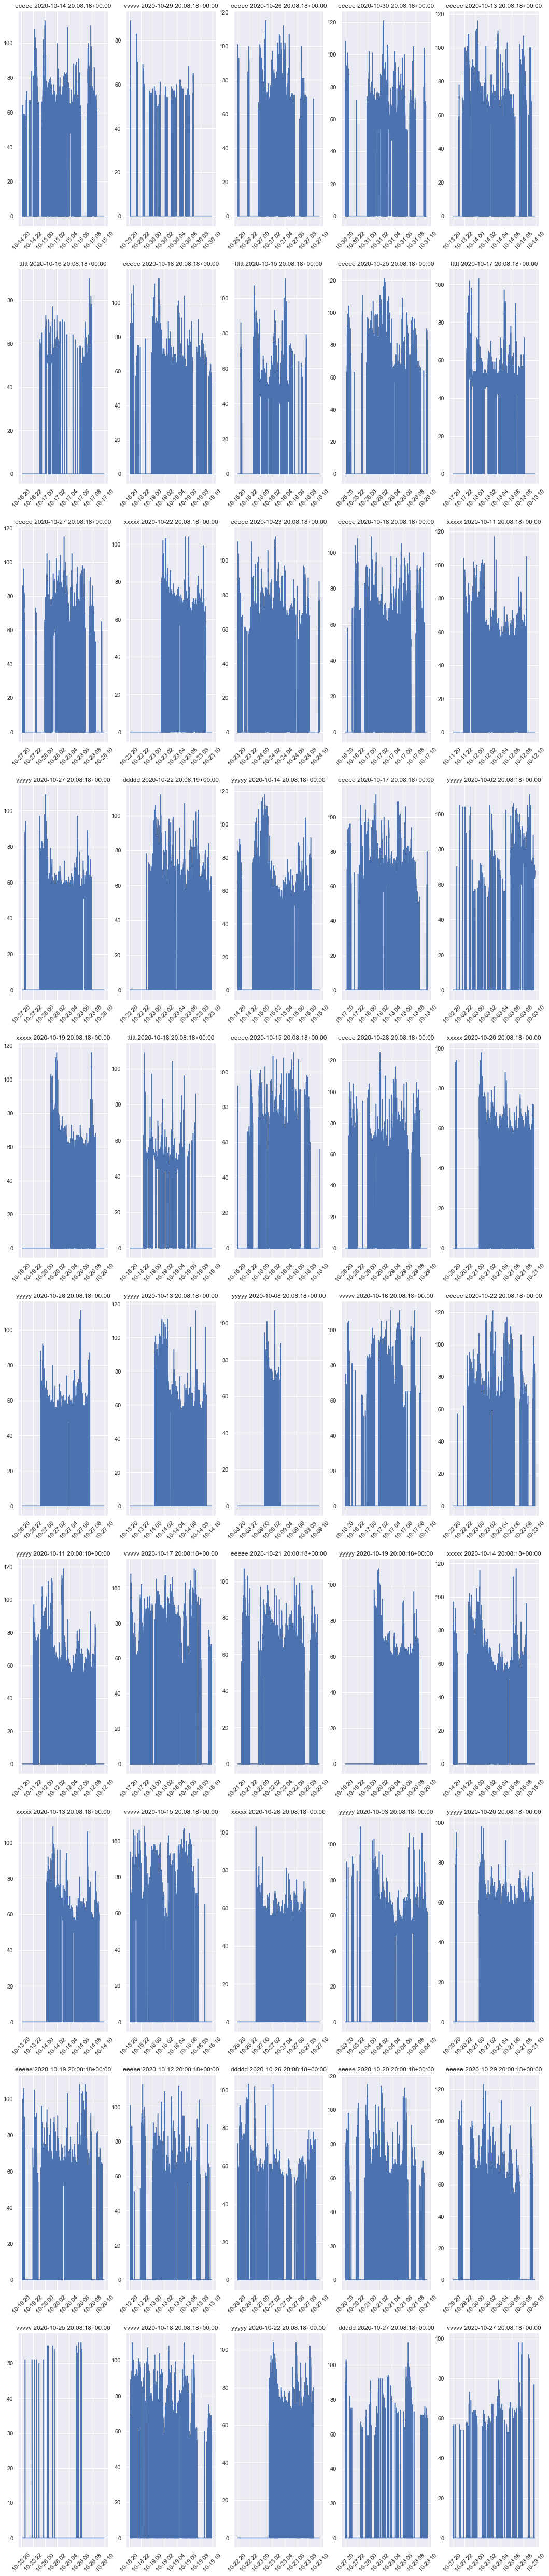

In [165]:
def display_data(data_frames, feature='heart_rate_ff', save=False, file_name=""):
    nbr_dfs = len(data_frames)
    
    #fig, axs = plt.subplots(10, 5, figsize=(18,9 * nbr_dfs/5))
    fig, axs = plt.subplots(10, 5, figsize=(18,9 * nbr_dfs/5))

    xs = [_df.index for _df in data_frames]    
    ys = [_df[feature] for _df in data_frames]
    titles = [f"{_df.iloc[0]['patient']} {_df.index[0]}"
              for _df in data_frames]
    
    for column in range(5):
        for row in range(10):
            i = row*5 + column
            axs[row][column].plot(xs[i], ys[i])
            axs[row][column].xaxis.set_tick_params(rotation=45)
            axs[row][column].set_title(titles[i])
            
    if save:
        if not file_name:
            file_name = f'all_50samples_{feature}.png'
        fig.savefig(IMAGES_DIR + file_name)

    plt.show()

display_data(dfs, 'heart_rate_ff', True)


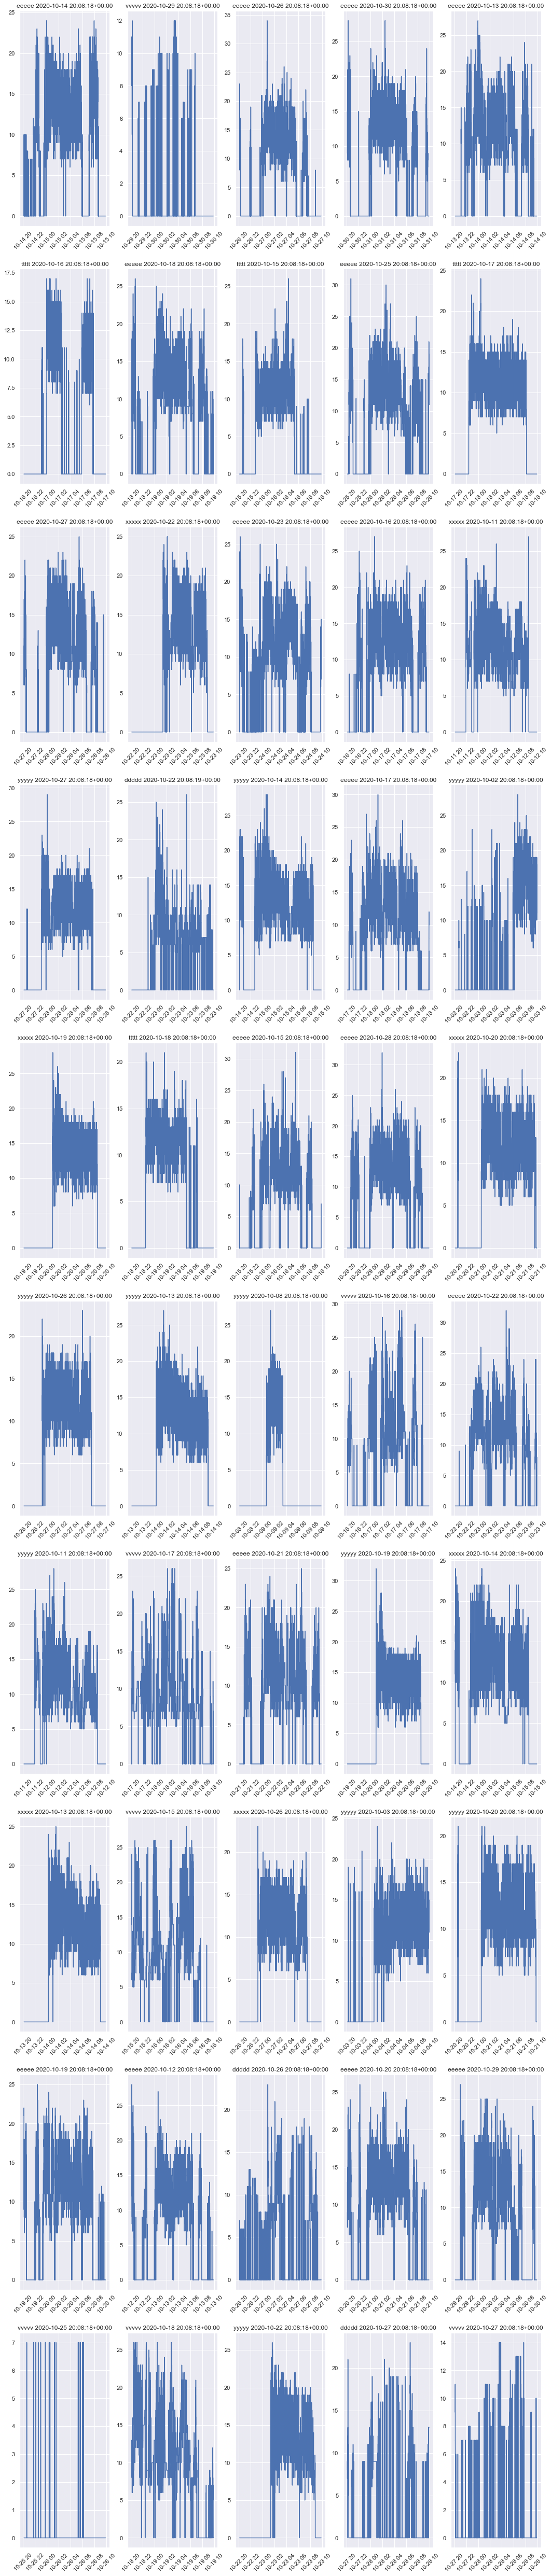

In [166]:
display_data(dfs, 'respiration_rate_ff', True)

## Downsampling

The downsampling shall produce different granularities using resample approaches.

* 1 Hour
* 30 Minutes
* 5 Minutes
* 1 Minute


In [167]:
dfs[0][['heart_rate_ff', 'respiration_rate_ff', 'patient']].resample('60Min').mean()

heart_rate_ff  respiration_rate_ff
timestamp                                                    
2020-10-14 20:00:00+00:00       1.568988             2.154417
2020-10-14 21:00:00+00:00       1.961944             0.666111
2020-10-14 22:00:00+00:00      36.632222             8.374167
2020-10-14 23:00:00+00:00      18.368889             3.863333
2020-10-15 00:00:00+00:00      65.049444            14.731944
2020-10-15 01:00:00+00:00      61.674167            14.470278
2020-10-15 02:00:00+00:00      55.741389            13.154444
2020-10-15 03:00:00+00:00      54.245000            12.445833
2020-10-15 04:00:00+00:00      55.600000            12.931667
2020-10-15 05:00:00+00:00      47.381944            11.451389
2020-10-15 06:00:00+00:00       0.063333             0.015556
2020-10-15 07:00:00+00:00      51.088889            12.481389
2020-10-15 08:00:00+00:00      35.524167             8.764722
2020-10-15 09:00:00+00:00       0.000000             0.000000

### 1 Hour granularity

In [168]:
dfs_1h = []
for _df in dfs:
    patient = _df.iloc[0].patient
    df_1h = _df[['heart_rate_ff', 'respiration_rate_ff']].resample('60Min').mean()
    df_1h.columns = ['heart_rate', 'respiration_rate']
    #df_1h['patient'] = [patient for _ in range(df_1h.shape[0])]
    df_1h['patient'] = df_1h.apply(lambda _: patient, axis=1)
    dfs_1h.append(df_1h)


In [169]:
dfs_1h[0].head()

heart_rate  respiration_rate patient
timestamp                                                      
2020-10-14 20:00:00+00:00    1.568988          2.154417   eeeee
2020-10-14 21:00:00+00:00    1.961944          0.666111   eeeee
2020-10-14 22:00:00+00:00   36.632222          8.374167   eeeee
2020-10-14 23:00:00+00:00   18.368889          3.863333   eeeee
2020-10-15 00:00:00+00:00   65.049444         14.731944   eeeee

In [170]:
len(dfs)

50

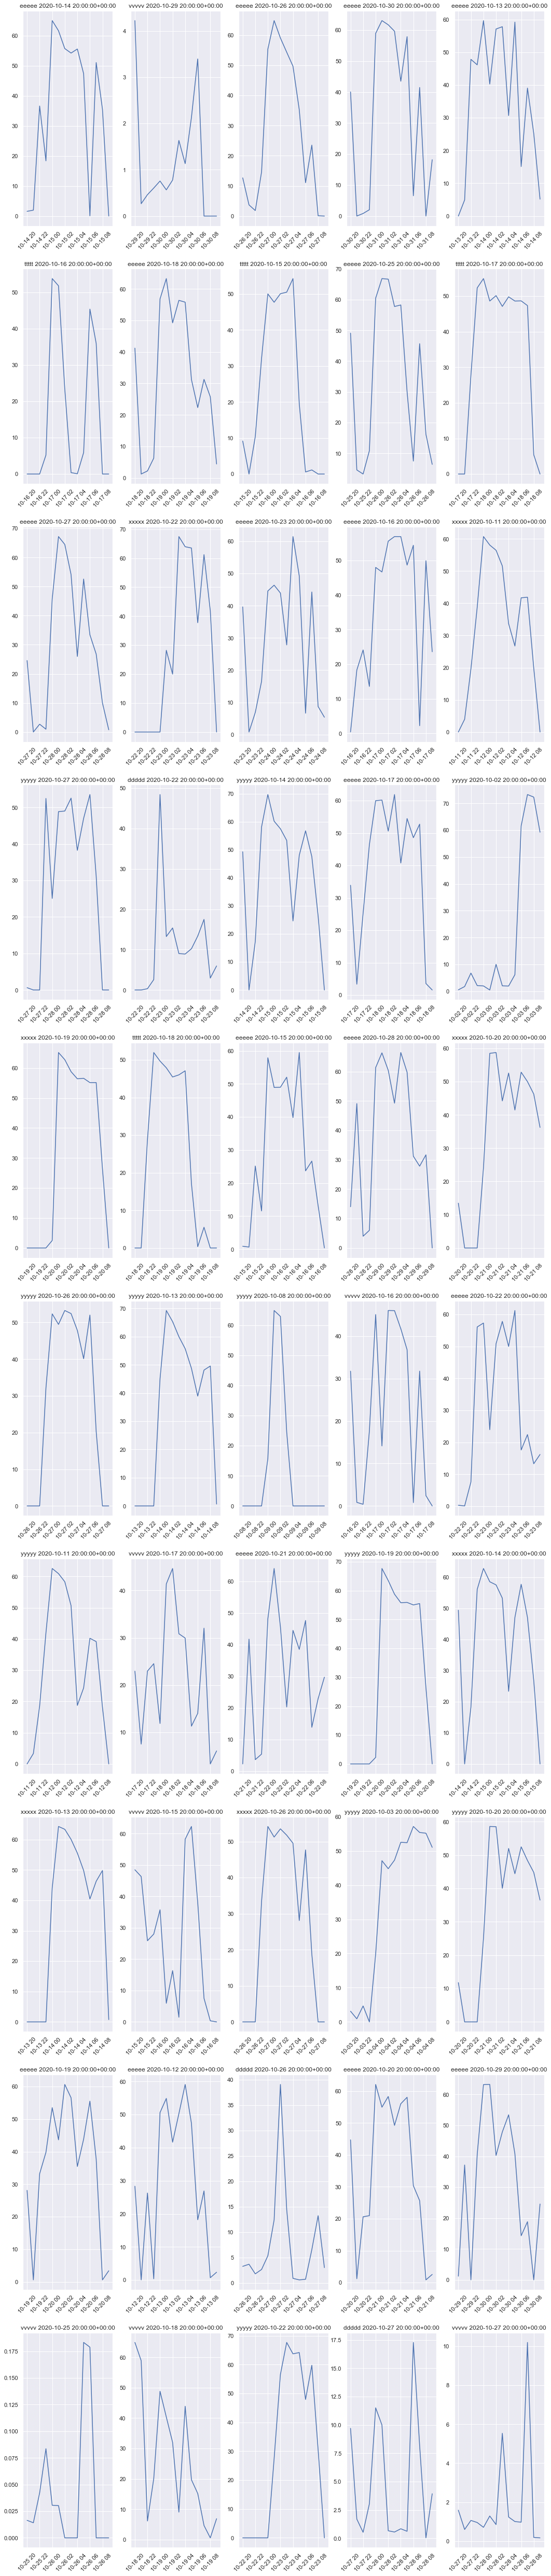

In [202]:
display_data(dfs_1h, 'heart_rate', True, 'all_50samples_heart_rate_1hour.png')


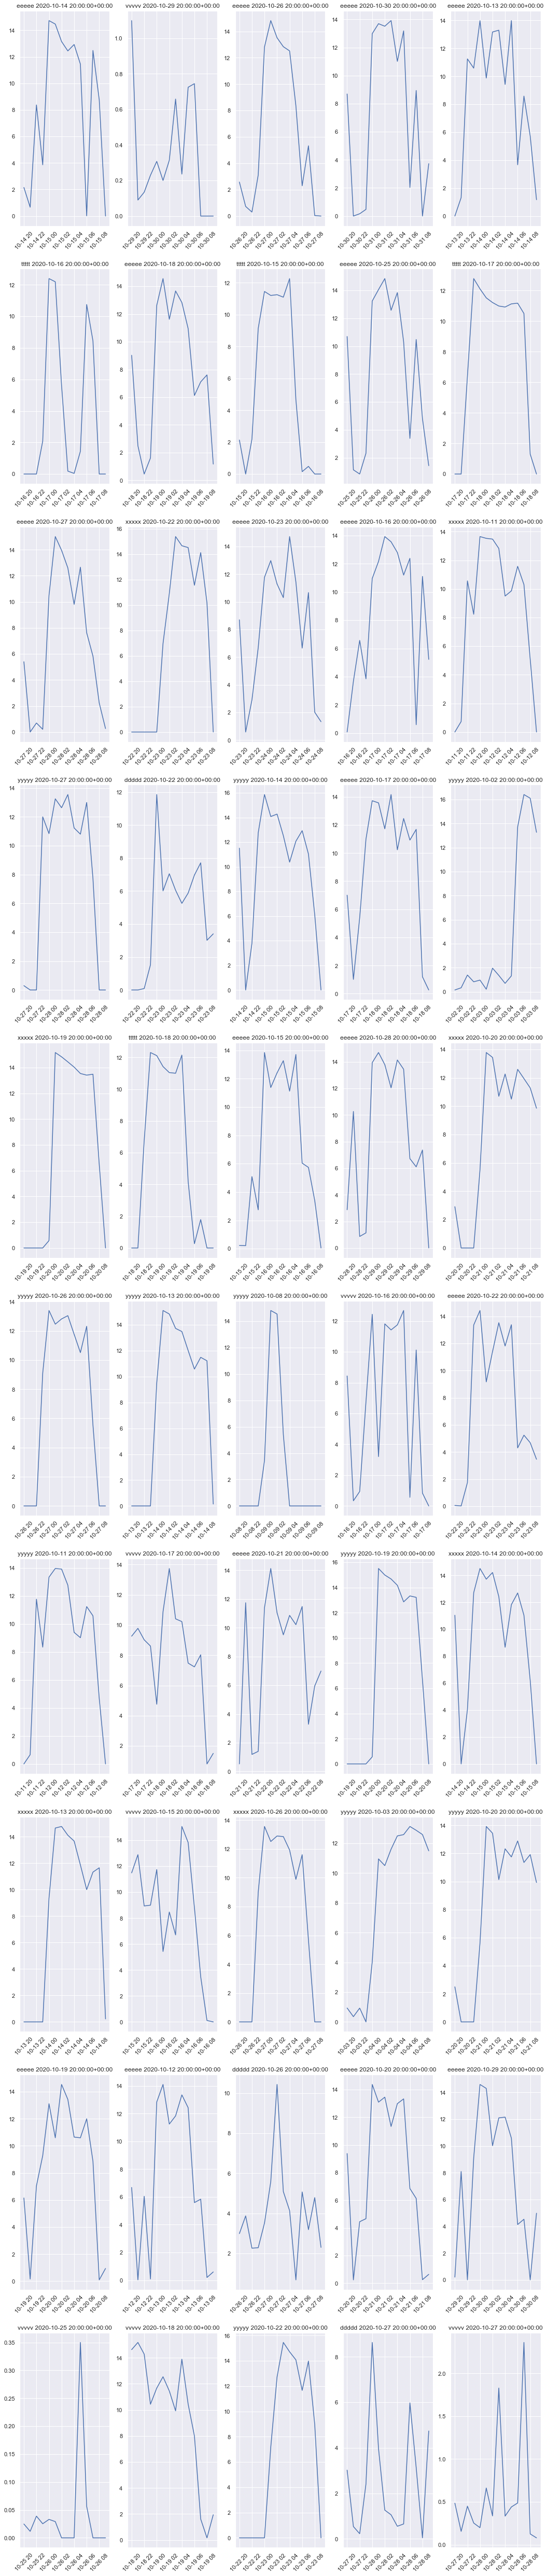

In [203]:
display_data(dfs_1h, 'respiration_rate', True, 'all_50samples_respiration_rate_1hour.png')

In [174]:
patient_counter = {'ddddd': 0,
                   'eeeee': 0,
                   'ttttt': 0,
                   'vvvvv': 0,
                   'xxxxx': 0,
                   'yyyyy': 0}

for _df in dfs_1h:
    patient = _df.iloc[0].patient
    #print(patient)
    patient_counter[patient] += 1
    nbr = patient_counter[patient]
    
    _df.to_csv(PATH_CLEAN + 'one_hour/' + f'{patient}_{nbr}.csv')

### 30 min granularity

In [180]:
dfs_30m = []
for _df in dfs:
    patient = _df.iloc[0].patient
    df_30m = _df[['heart_rate_ff', 'respiration_rate_ff']].resample('30Min').mean()
    df_30m.columns = ['heart_rate', 'respiration_rate']
    #df_1h['patient'] = [patient for _ in range(df_1h.shape[0])]
    df_30m['patient'] = df_30m.apply(lambda _: patient, axis=1)
    dfs_30m.append(df_30m)


In [181]:
dfs_30m[0]

heart_rate  respiration_rate patient
timestamp                                                      
2020-10-14 20:00:00+00:00    1.347158          2.657450   eeeee
2020-10-14 20:30:00+00:00    1.729444          1.790556   eeeee
2020-10-14 21:00:00+00:00    0.111111          0.346111   eeeee
2020-10-14 21:30:00+00:00    3.812778          0.986111   eeeee
2020-10-14 22:00:00+00:00   50.372778         10.585000   eeeee
2020-10-14 22:30:00+00:00   22.891667          6.163333   eeeee
2020-10-14 23:00:00+00:00    1.492778          0.278333   eeeee
2020-10-14 23:30:00+00:00   35.245000          7.448333   eeeee
2020-10-15 00:00:00+00:00   63.797222         13.999444   eeeee
2020-10-15 00:30:00+00:00   66.301667         15.464444   eeeee
2020-10-15 01:00:00+00:00   62.570000         14.362778   eeeee
2020-10-15 01:30:00+00:00   60.778333         14.577778   eeeee
2020-10-15 02:00:00+00:00   57.051667         13.666111   eeeee
2020-10-15 02:30:00+00:00   54.431111         12.642778   eeeee
2020-10-15 03:00:00+00:00   52.786667         12.295556   eeeee
2020-10-15 03:30:00+00:00   55.703333         12.596111   eeeee
2020-10-15 04:00:00+00:00   55.222222         13.137778   eeeee
2020-10-15 04:30:00+00:00   55.977778         12.725556   eeeee
2020-10-15 05:00:00+00:00   56.577778         13.107222   eeeee
2020-10-15 05:30:00+00:00   38.186111          9.795556   eeeee
2020-10-15 06:00:00+00:00    0.126667          0.031111   eeeee
2020-10-15 06:30:00+00:00    0.000000          0.000000   eeeee
2020-10-15 07:00:00+00:00   42.763889         11.262778   eeeee
2020-10-15 07:30:00+00:00   59.413889         13.700000   eeeee
2020-10-15 08:00:00+00:00   59.696667         14.682222   eeeee
2020-10-15 08:30:00+00:00   11.351667          2.847222   eeeee
2020-10-15 09:00:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:30:00+00:00    0.000000          0.000000   eeeee

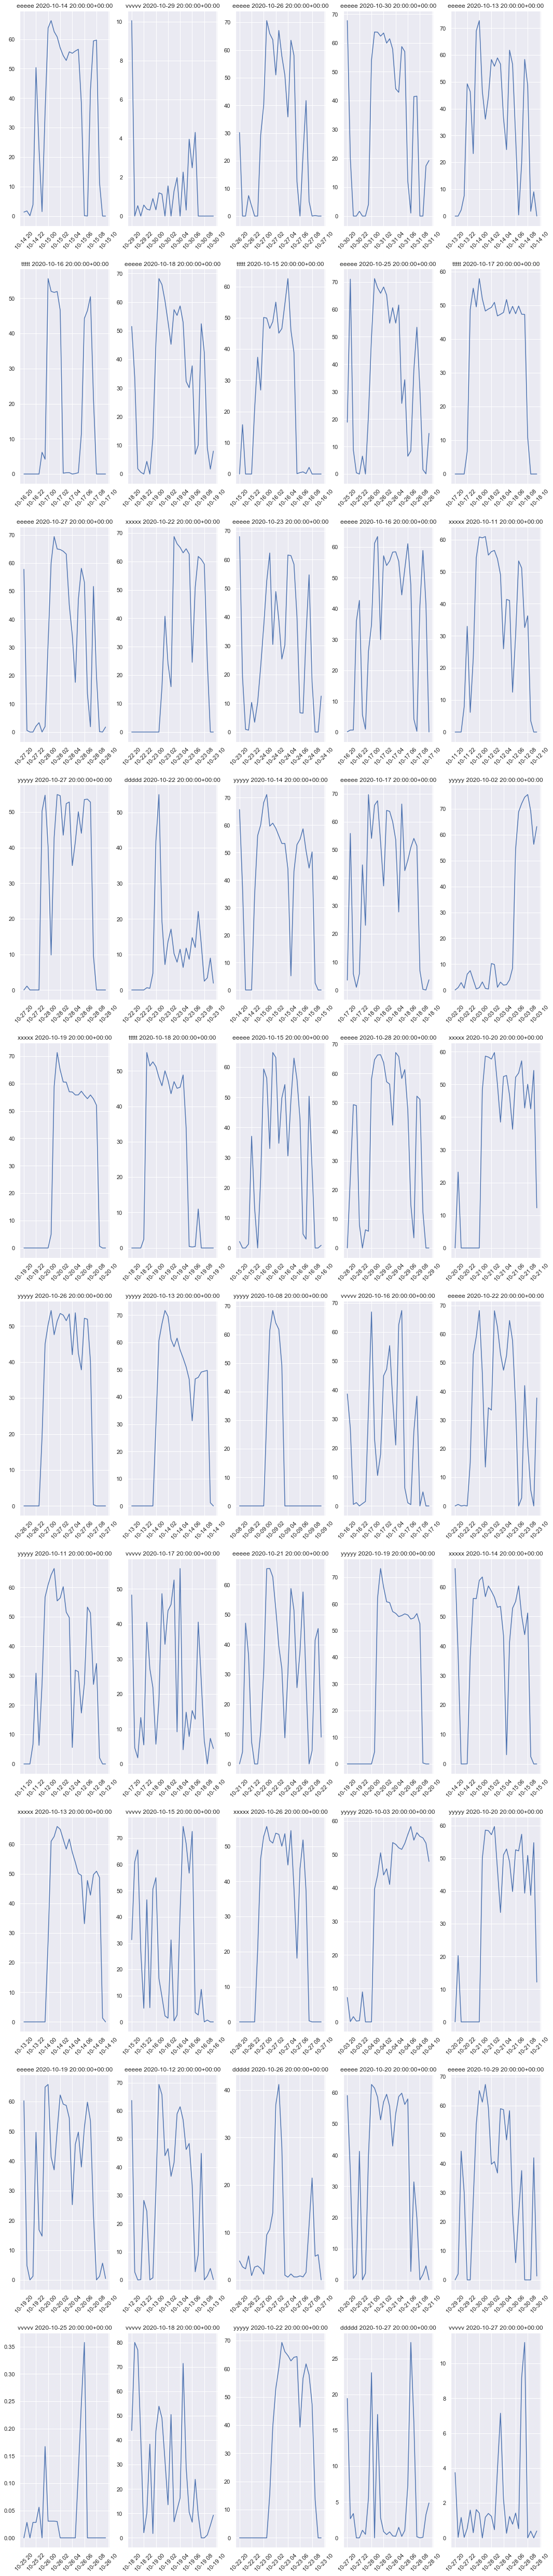

In [185]:
display_data(dfs_30m, 'heart_rate', True, 'all_50samples_heart_rate_30min.png')

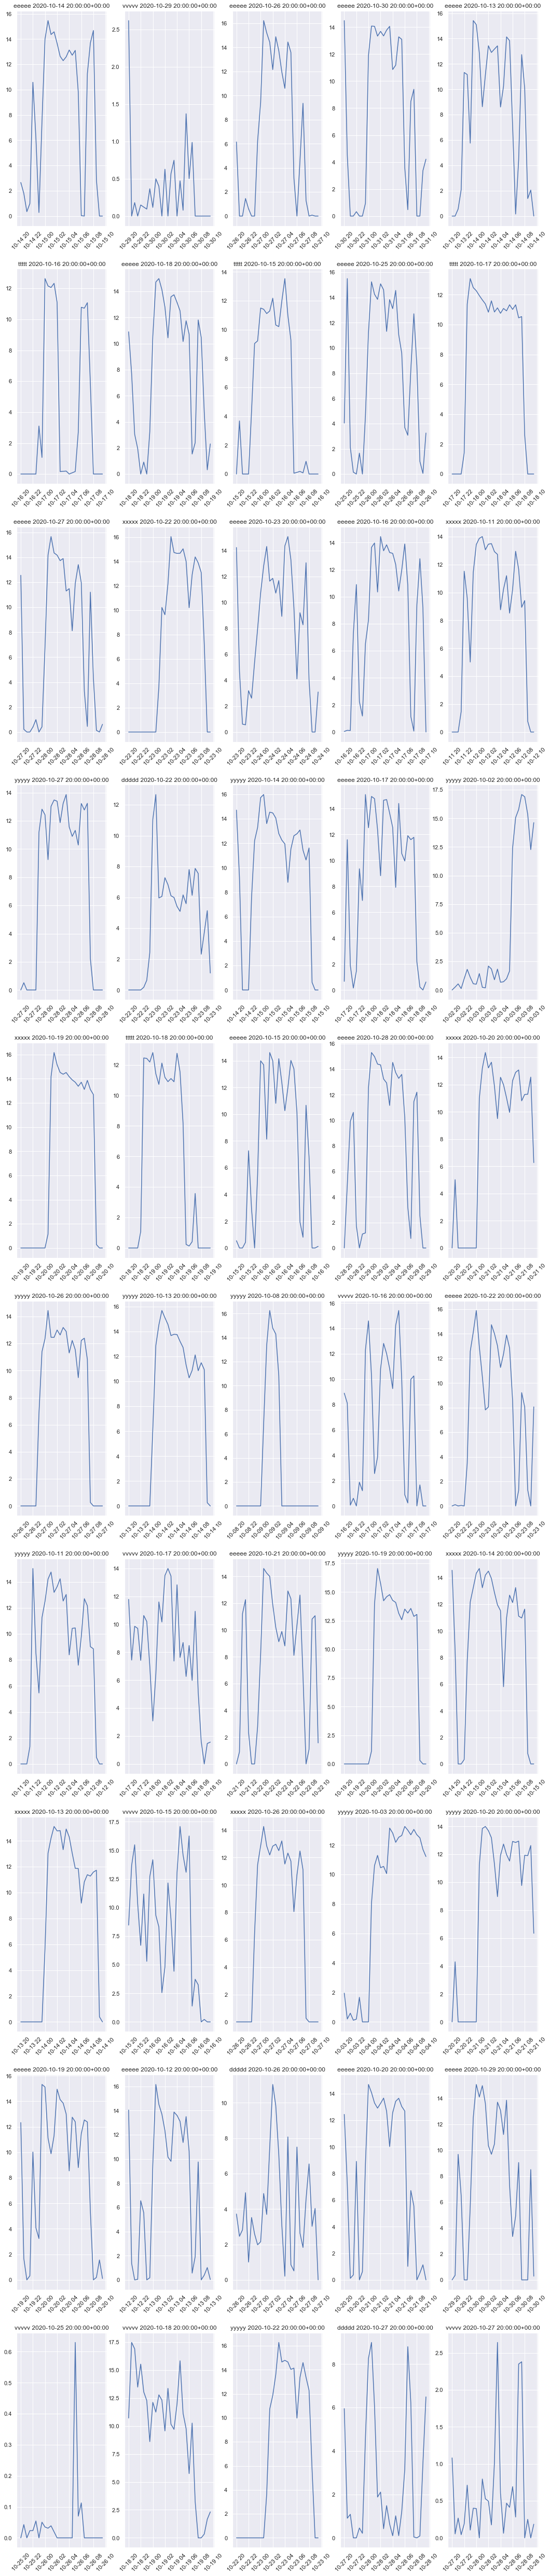

In [186]:
display_data(dfs_30m, 'respiration_rate', True, 'all_50samples_respiration_rate_30min.png')

In [184]:
patient_counter = {'ddddd': 0,
                   'eeeee': 0,
                   'ttttt': 0,
                   'vvvvv': 0,
                   'xxxxx': 0,
                   'yyyyy': 0}

for _df in dfs_30m:
    patient = _df.iloc[0].patient
    #print(patient)
    patient_counter[patient] += 1
    nbr = patient_counter[patient]
    
    _df.to_csv(PATH_CLEAN + 'thirty_min/' + f'{patient}_{nbr}.csv')

### 5 min granularity

In [187]:
dfs_5m = []
for _df in dfs:
    patient = _df.iloc[0].patient
    df_5m = _df[['heart_rate_ff', 'respiration_rate_ff']].resample('5Min').mean()
    df_5m.columns = ['heart_rate', 'respiration_rate']
    df_5m['patient'] = df_5m.apply(lambda _: patient, axis=1)
    dfs_5m.append(df_5m)


In [188]:
dfs_5m[0]

heart_rate  respiration_rate patient
timestamp                                                      
2020-10-14 20:05:00+00:00    0.627451          0.882353   eeeee
2020-10-14 20:10:00+00:00    1.860000          4.100000   eeeee
2020-10-14 20:15:00+00:00    1.356667          4.400000   eeeee
2020-10-14 20:20:00+00:00    0.000000          0.766667   eeeee
2020-10-14 20:25:00+00:00    2.416667          1.966667   eeeee
...                               ...               ...     ...
2020-10-15 09:30:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:35:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:40:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:45:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:50:00+00:00    0.000000          0.000000   eeeee

[166 rows x 3 columns]

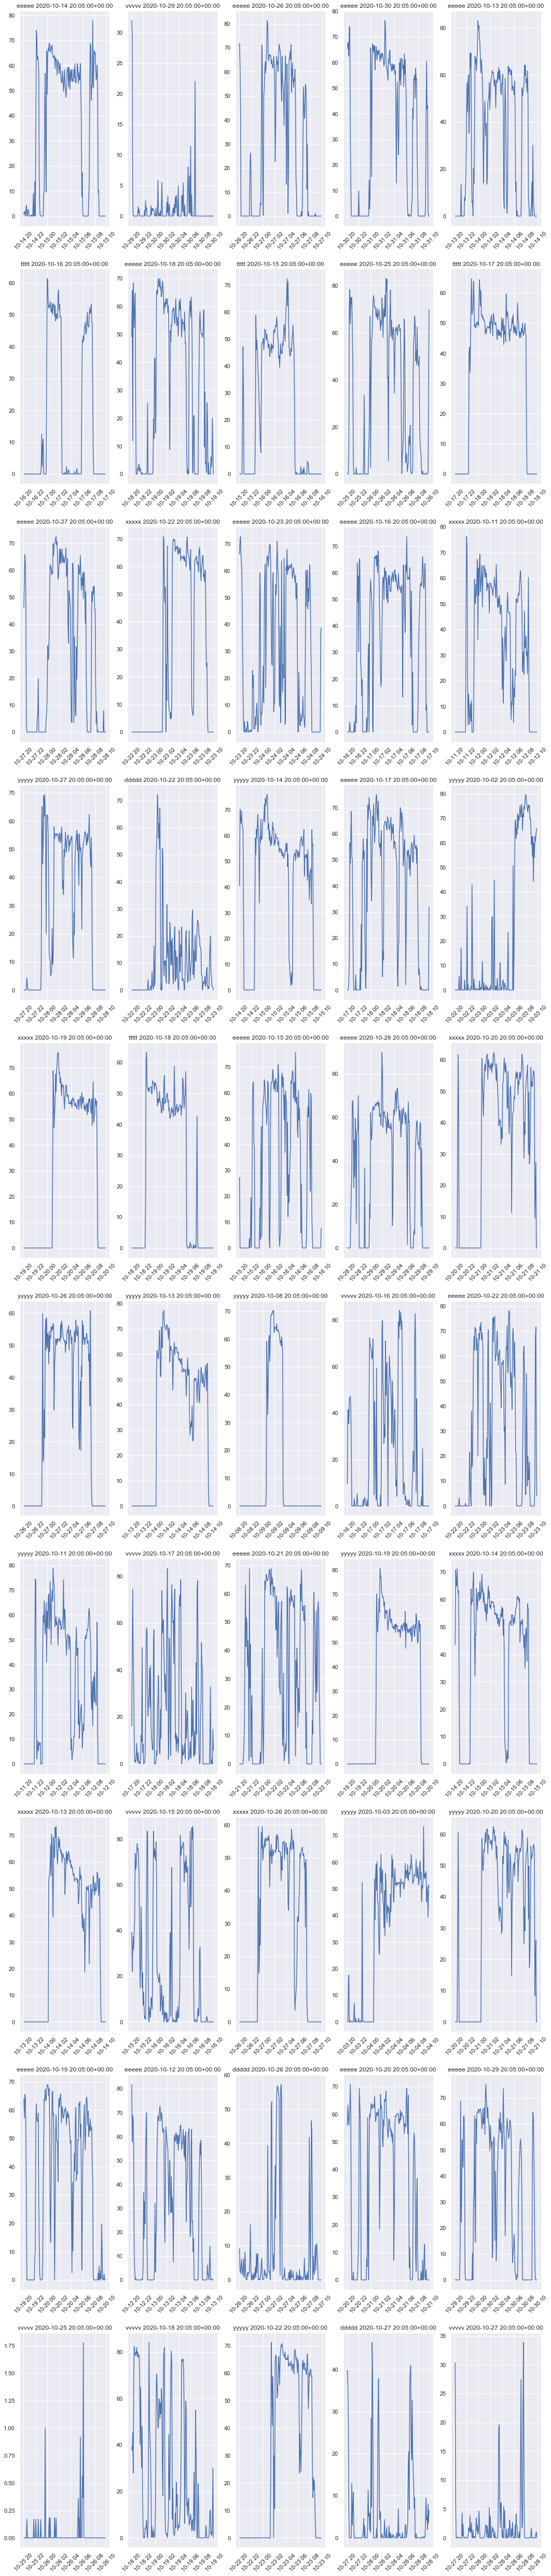

In [189]:
display_data(dfs_5m, 'heart_rate', True, 'all_50samples_heart_rate_5min.png')

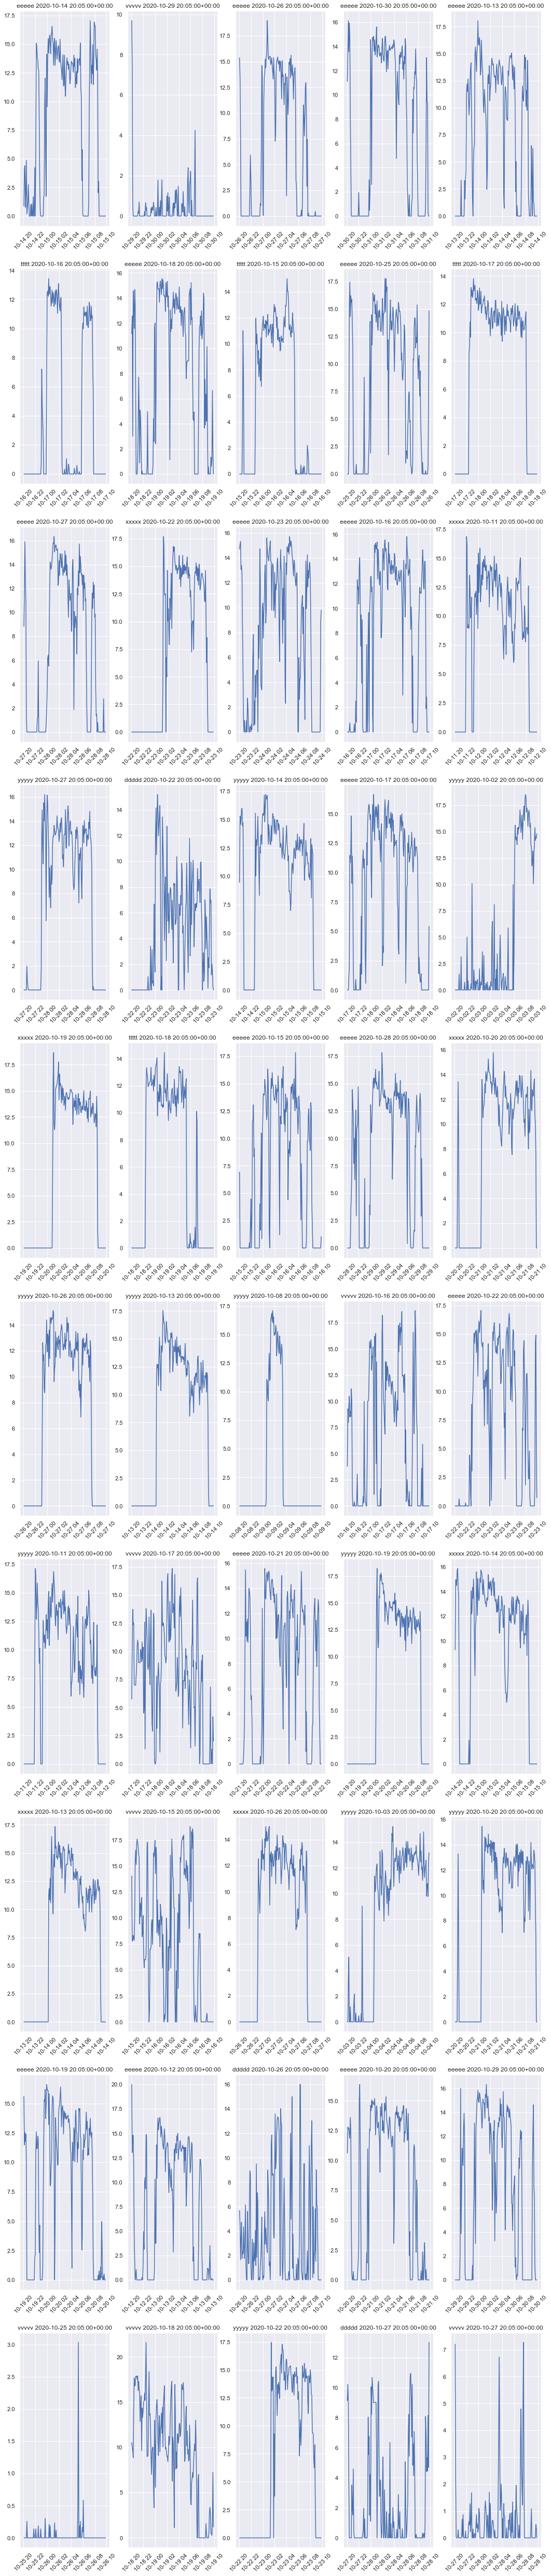

In [190]:
display_data(dfs_5m, 'respiration_rate', True, 'all_50samples_respiration_rate_5min.png')

In [191]:
patient_counter = {'ddddd': 0,
                   'eeeee': 0,
                   'ttttt': 0,
                   'vvvvv': 0,
                   'xxxxx': 0,
                   'yyyyy': 0}

for _df in dfs_5m:
    patient = _df.iloc[0].patient
    #print(patient)
    patient_counter[patient] += 1
    nbr = patient_counter[patient]
    
    _df.to_csv(PATH_CLEAN + 'five_min/' + f'{patient}_{nbr}.csv')

### 1 min granularity

In [197]:
dfs_1m = []
for _df in dfs:
    patient = _df.iloc[0].patient
    df_1m = _df[['heart_rate_ff', 'respiration_rate_ff']].resample('1Min').mean()
    df_1m.columns = ['heart_rate', 'respiration_rate']
    df_1m['patient'] = df_1m.apply(lambda _: patient, axis=1)
    dfs_1m.append(df_1m)


In [198]:
dfs_1m[0]

heart_rate  respiration_rate patient
timestamp                                                      
2020-10-14 20:08:00+00:00    1.523810          2.142857   eeeee
2020-10-14 20:09:00+00:00    0.000000          0.000000   eeeee
2020-10-14 20:10:00+00:00    0.000000          0.000000   eeeee
2020-10-14 20:11:00+00:00    6.316667          5.333333   eeeee
2020-10-14 20:12:00+00:00    2.983333          6.500000   eeeee
...                               ...               ...     ...
2020-10-15 09:48:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:49:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:50:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:51:00+00:00    0.000000          0.000000   eeeee
2020-10-15 09:52:00+00:00    0.000000          0.000000   eeeee

[825 rows x 3 columns]

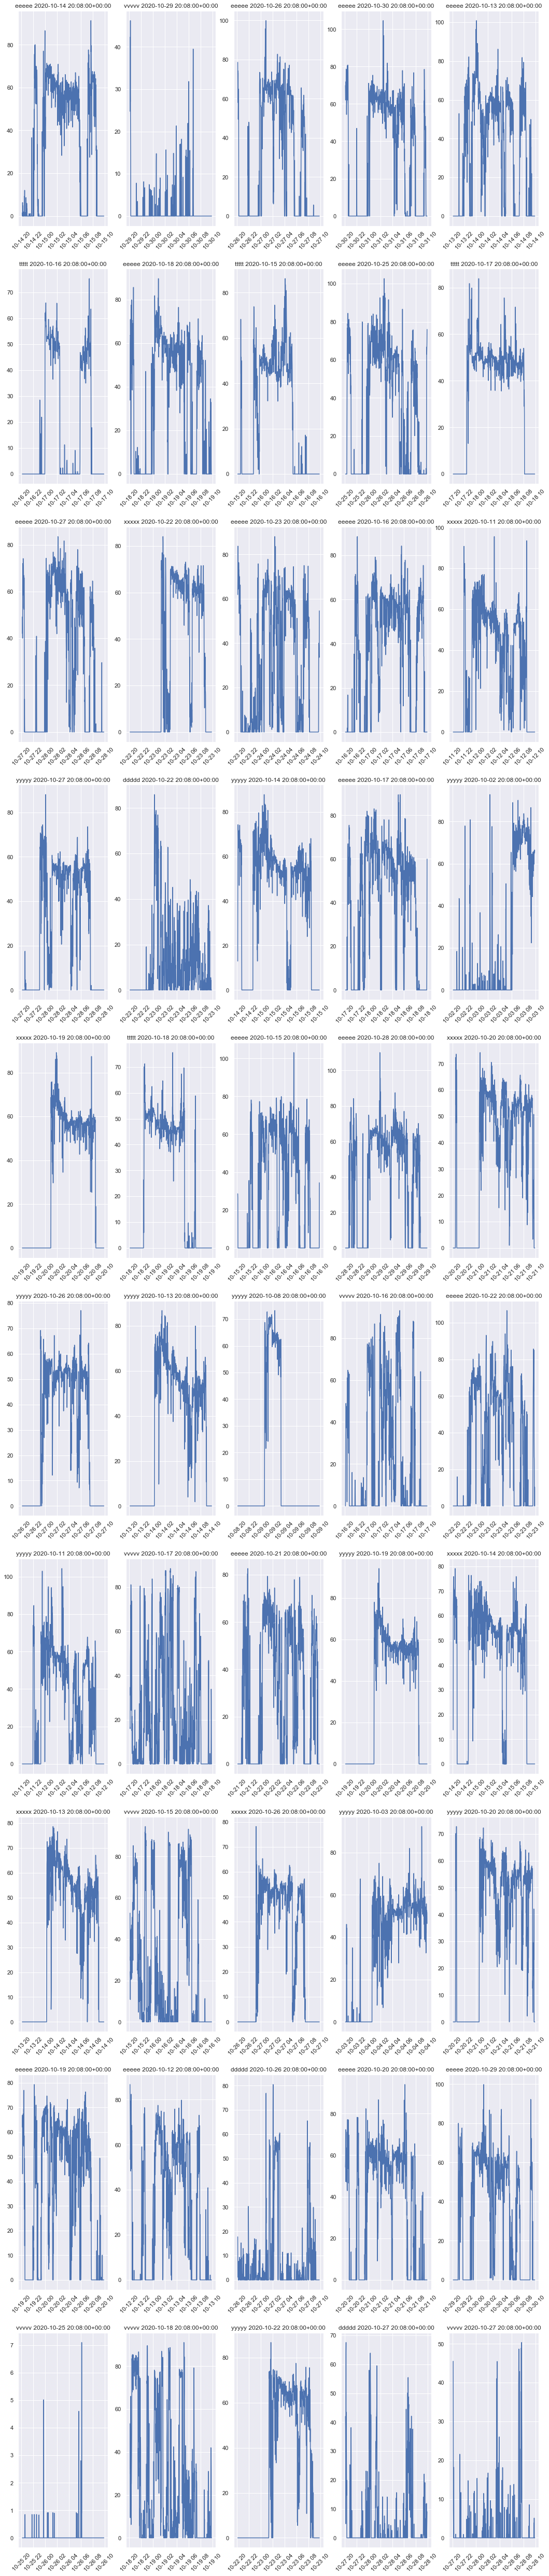

In [199]:
display_data(dfs_1m, 'heart_rate', True, 'all_50samples_heart_rate_1min.png')

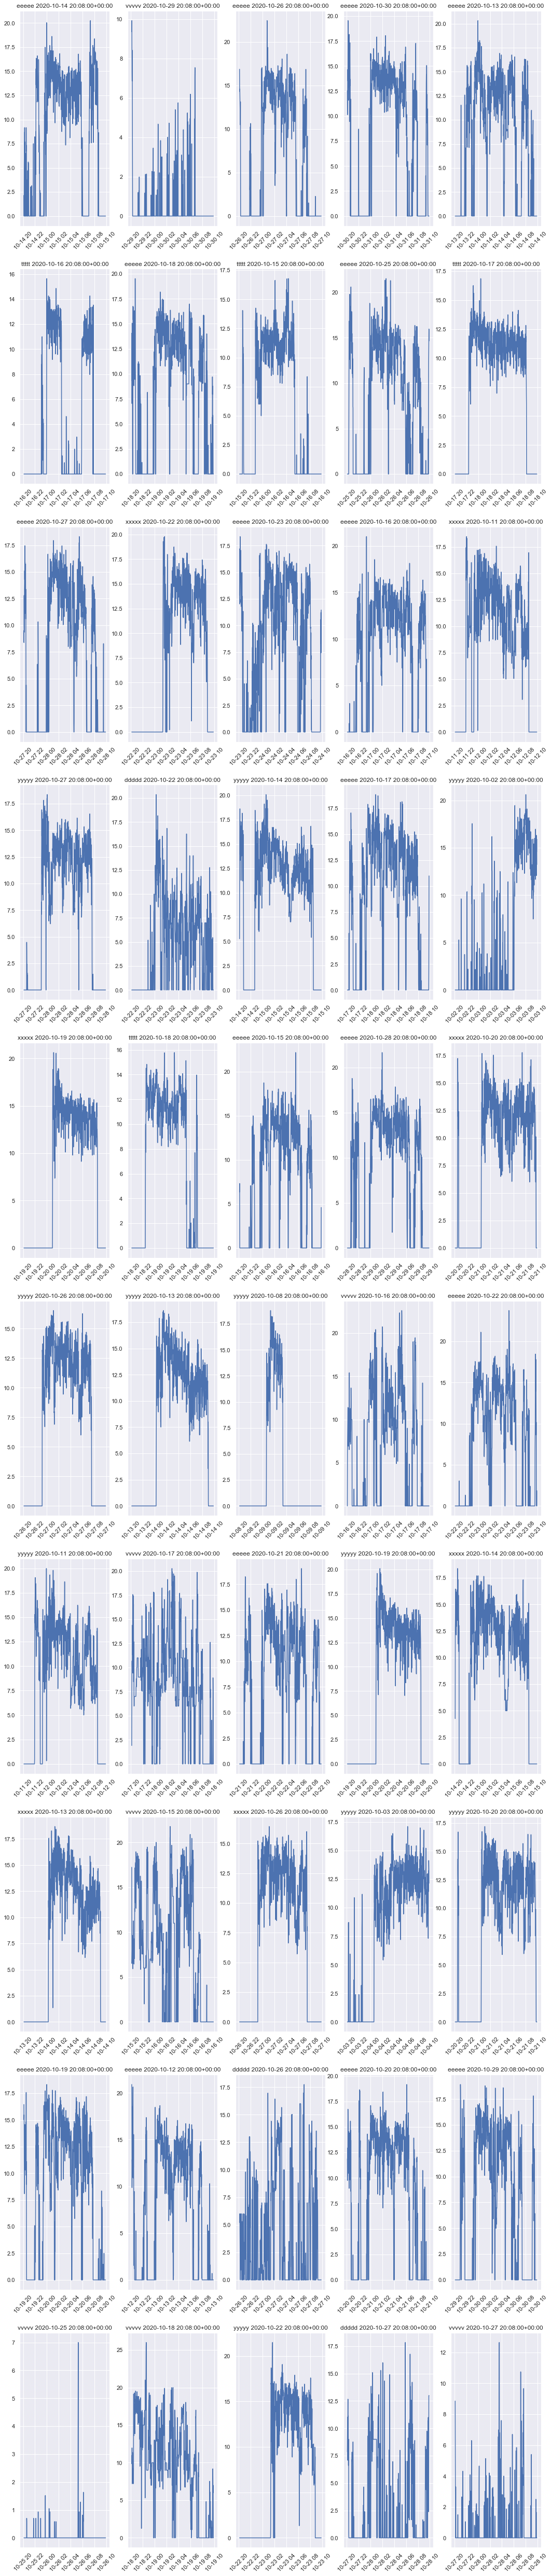

In [200]:
display_data(dfs_1m, 'respiration_rate', True, 'all_50samples_respiration_rate_1min.png')

In [201]:
patient_counter = {'ddddd': 0,
                   'eeeee': 0,
                   'ttttt': 0,
                   'vvvvv': 0,
                   'xxxxx': 0,
                   'yyyyy': 0}

for _df in dfs_1m:
    patient = _df.iloc[0].patient
    #print(patient)
    patient_counter[patient] += 1
    nbr = patient_counter[patient]
    
    _df.to_csv(PATH_CLEAN + 'one_min/' + f'{patient}_{nbr}.csv')